In [1]:
import pandas as pd
import numpy as np
#%qtconsole
import platform
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def return_file_path(base_url,file_name,file_seperator,intermediate_folder=''):
    if not intermediate_folder=='':
        intermediate_folder=intermediate_folder+file_seperator
    return '{}{}{}'.format(base_url,intermediate_folder,file_name)

In [3]:
if platform.system()=='Linux':
    base_url=r'/mnt/ECFC8291FC8255AC/Datasets/Codevita Results/'
    file_seperator='/'
else:
    file_seperator='\\'
    base_url='F:\\Datasets\\Codevita Results\\'
intermediate_folder=''

In [4]:
college_prev=pd.read_excel('./college_combined_2k15_2k16.xlsx')

In [5]:
college_prev.head()

,college_name,tcs_region,mod_index,coll_name_case_independent,college_name_modified_normalized,coll_name_mod_norm_wo_common_words,coll_name_mod_norm_wo_common_words_v2,master_mod_index
0,"Srm Engineering College., Kattankulathur",Chennai,2k15_0,"srm engineering college., kattankulathur",srm engineering college kattankulathur,srm kattankulathur,srm kattankulathur,2k15_0
1,"Army Institute of Technology,Pune University, ...",Pune,2k15_1,"army institute of technology,pune university, ...",army institute of technology pune university pune,army pune pune,army pune pune,2k15_1
2,"Osmania University, Hyderabad",Hyderabad,2k15_2,"osmania university, hyderabad",osmania university hyderabad,osmania hyderabad,osmania hyderabad,2k15_2
3,"Medicaps Inst of Tech & Management, Indore",Mumbai,2k15_3,"medicaps inst of tech & management, indore",medicaps inst of tech management indore,medicaps tech indore,medicaps tech indore,2k15_3
4,"Ramrao Adik Institute of Technology,Nerul",Mumbai,2k15_4,"ramrao adik institute of technology,nerul",ramrao adik institute of technology nerul,ramrao adik nerul,ramrao adik nerul,2k15_4


In [6]:
college_2k17=pd.read_csv(return_file_path(base_url,'codevita_2k17_scrapped.csv',file_seperator))

In [7]:
college_2k17.head()

,Unnamed: 0,college_name,problems_solved,round1_rank,user_name,zonal_name,zonal_rank
0,0,Dhirubhai Ambani Inst of Information & Communi...,6,1,MOHIB MANVA,zone1,1
1,1,Dhirubhai Ambani Inst of Information & Communi...,6,2,SAGAR SAVALIYA,zone1,2
2,2,"Indian Institute Of Technology, Hyderabad",6,3,VINOD DEVANABOINA,zone2,1
3,3,"School of IT, Guru Gobind Indraprastha Univ, D...",6,4,VIKRAM PANWAR,zone3,1
4,4,IIT - PATNA,5,5,GAGAN KUMAR,zone3,2


In [8]:
college_2k17=college_2k17.rename(columns={'zonal_name':'tcs_region'})

In [9]:
print(college_2k17.shape)
college_2k17.notnull().sum()

(2382, 7)


Unnamed: 0         2382
college_name       2382
problems_solved    2382
round1_rank        2382
user_name          2382
tcs_region         2382
zonal_rank         2382
dtype: int64

From the above we can see that there are no nulls

In [10]:
college_2k17_list=pd.DataFrame(college_2k17,columns=['college_name','tcs_region'])
college_2k17_list=college_2k17_list
college_2k17_list.college_name.unique().shape[0]

499

In [11]:
college_2k17_list['index']=college_2k17_list.index
college_2k17_list['mod_index']=college_2k17_list['index'].apply(lambda x:'2k17_'+str(x))
college_2k17_list=college_2k17_list.drop('index',axis=1)

In [12]:
college_2k17_list.head()

,college_name,tcs_region,mod_index
0,Dhirubhai Ambani Inst of Information & Communi...,zone1,2k17_0
1,Dhirubhai Ambani Inst of Information & Communi...,zone1,2k17_1
2,"Indian Institute Of Technology, Hyderabad",zone2,2k17_2
3,"School of IT, Guru Gobind Indraprastha Univ, D...",zone3,2k17_3
4,IIT - PATNA,zone3,2k17_4


Using exact string matching to check the common entries between colleges in 2k15 and 2k16

In [13]:
sum(college_2k17_list.college_name.isin(college_2k15.college_name)) #Gives me the number of exact college matches between 2k15 and 2k16

264

In [14]:
direct_match_rows_2k16=college_2k16[college_2k16.college_name.isin(college_2k15.college_name)]
direct_match_rows_2k15=college_2k15[college_2k15.college_name.isin(college_2k16.college_name)]

Do note that it makes sense to actually check whether the matched colleges have same region or different regions...if a matched college has a different region then it is probably a wrong match...we will be checking this assertion after every college name matching attempt

In [15]:
def assert_tcs_region_equality(df1,df2,college_col_name_df1,college_col_name_df2,tcs_region_col_name_df1='tcs_region',tcs_region_col_name_df2='tcs_region'):
    for index,row in df2.iterrows():
        assert(sum(df1[tcs_region_col_name_df1][df1[college_col_name_df1].isin([row[college_col_name_df2]])]!=row[tcs_region_col_name_df2])==0),"index_df2:{},tcs_region_df1:{},tcs_region_df2:{},college_name:{}".format(index,df1[tcs_region_col_name_df1][df1[college_col_name_df1].isin([row[college_col_name_df2]])],row[tcs_region_col_name_df2],row[college_col_name_df2])

In [16]:
assert_tcs_region_equality(direct_match_rows_2k15,direct_match_rows_2k16,'college_name','college_name')

In [17]:
(264/548*100,264/685*100)

(48.175182481751825, 38.54014598540146)

i.e. 48% of the entries in the 2k15 databases and 38.5% of the entries in the 2k16 databases are common...let's apply some more advanced techniques to see whether or not we can match some more entries from both the years

Now let's try out by first changing all the colleges names to lower case for both upper and lower case inorder to make it case insensitive

In [18]:
college_2k16['coll_name_case_independent']=college_2k16.college_name.str.lower()
college_2k15['coll_name_case_independent']=college_2k15.college_name.str.lower()

In [19]:
sum(college_2k16.coll_name_case_independent.isin(college_2k15.coll_name_case_independent)) 

282

In [20]:
case_norm_match_rows_2k16=college_2k16[college_2k16.coll_name_case_independent.isin(college_2k15.coll_name_case_independent)]
case_norm_match_rows_2k15=college_2k15[college_2k15.coll_name_case_independent.isin(college_2k16.coll_name_case_independent)]

In each step from now, there will be an assertion as to whether any of the matched values from the previous steps aren't matched now

In [21]:
def assert_no_new_mismatch(df1,df2,previous_df1,previous_df2):
    assert(np.setdiff1d(previous_df1.index,df1.index).shape[0]==0),"Problem in 1st assertion"
    assert(np.setdiff1d(previous_df2.index,df2.index).shape[0]==0),"Problem in 2nd assertion"

In [22]:
assert_tcs_region_equality(case_norm_match_rows_2k15,case_norm_match_rows_2k16,'coll_name_case_independent','coll_name_case_independent')

In [23]:
assert_no_new_mismatch(case_norm_match_rows_2k15,case_norm_match_rows_2k16,direct_match_rows_2k15,direct_match_rows_2k16)

Some of the names which got matched now but werent matched previously are:

In [24]:
def new_matches(df,prev_df,return_df_cols):
    new_indexes_df=np.setdiff1d(df.index,prev_df.index)
    return df.loc[new_indexes_df,return_df_cols]

Few of the new matches are:

In [25]:
new_matches(case_norm_match_rows_2k16,direct_match_rows_2k16,['college_name','coll_name_case_independent','tcs_region'])

,college_name,coll_name_case_independent,tcs_region
151,ldrp,ldrp,Ahmedabad
154,Northern India Engineering College,northern india engineering college,Delhi
155,Marwadi Education Foundations Group of Institu...,marwadi education foundations group of institu...,Ahmedabad
222,INSTITUTE OF AERONAUTICAL ENGINEERING,institute of aeronautical engineering,Hyderabad
351,jaipur national university,jaipur national university,Delhi
429,JECRC UNIVERSITY,jecrc university,Delhi
467,BUDGE BUDGE INSTITUTE OF TECHNOLOGY,budge budge institute of technology,Kolkata
476,babaria institute of technology,babaria institute of technology,Ahmedabad
480,CMR College of Engineering and Technology,cmr college of engineering and technology,Hyderabad
483,Pranveer Singh Institute of Technology,pranveer singh institute of technology,Lucknow


What we can see from the above new matches is that, there are many colleges which had different spellings and hence were counted differently but now after they are case normalized, they are becoming duplicates...let's see the duplicate list first

In [26]:
coll_case_ind_2016_count=case_norm_match_rows_2k16.coll_name_case_independent.value_counts()
coll_case_ind_2016_count[coll_case_ind_2016_count>1]

institute of aeronautical engineering                  5
budge budge institute of technology                    3
pranveer singh institute of technology                 3
ldrp itr gandhinagar                                   3
cmr college of engineering and technology              2
ldrp                                                   2
indian institute of technology, hyderabad              2
amritsar college of engineering and technology         2
lovely professional university                         2
jecrc university                                       2
marwadi education foundations group of institutions    2
Name: coll_name_case_independent, dtype: int64

In [27]:
(282/548*100,282/685*100)

(51.45985401459854, 41.16788321167883)

That did help and we managed to get few more matches

Now let's try to remove any non alphanumeric characters(i.e. special characters) from the college names and replace it with a single blank space and see if that improves our matching...for this, we will be using a library called NLTK, which is a NLP library written in Python

In [28]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [29]:
def modify_college_names_modified_column(x):
    return ' '.join(tokenizer.tokenize(x))
college_2k16['college_name_modified_normalized']=college_2k16.coll_name_case_independent.apply(modify_college_names_modified_column)

In [30]:
college_2k15['college_name_modified_normalized']=college_2k15.coll_name_case_independent.apply(modify_college_names_modified_column)

In [31]:
college_2k15.head()

,Unnamed: 0,college_name,tcs_region,mod_index,coll_name_case_independent,college_name_modified_normalized
0,0,"Srm Engineering College., Kattankulathur",Chennai,2k15_0,"srm engineering college., kattankulathur",srm engineering college kattankulathur
1,1,"Army Institute of Technology,Pune University, ...",Pune,2k15_1,"army institute of technology,pune university, ...",army institute of technology pune university pune
2,2,"Osmania University, Hyderabad",Hyderabad,2k15_2,"osmania university, hyderabad",osmania university hyderabad
3,3,"Medicaps Inst of Tech & Management, Indore",Mumbai,2k15_3,"medicaps inst of tech & management, indore",medicaps inst of tech management indore
4,4,"Ramrao Adik Institute of Technology,Nerul",Mumbai,2k15_4,"ramrao adik institute of technology,nerul",ramrao adik institute of technology nerul


In [32]:
college_2k16.head()

,Unnamed: 0,college_name,tcs_region,mod_index,coll_name_case_independent,college_name_modified_normalized
0,0,"Kalyani Govt. Engg. College, WB",Kolkata,2k16_0,"kalyani govt. engg. college, wb",kalyani govt engg college wb
1,1,IIT ­ PATNA,Kolkata,2k16_1,iit ­ patna,iit patna
2,2,Institute of Engg,Kolkata,2k16_2,institute of engg,institute of engg
3,3,nit patna,Kolkata,2k16_3,nit patna,nit patna
4,4,"Indian Institute Of Technology, Hyderabad",Hyderabad,2k16_4,"indian institute of technology, hyderabad",indian institute of technology hyderabad


In [33]:
sum(college_2k15.college_name_modified_normalized.isin(college_2k16.college_name_modified_normalized)) 

311

In [34]:
normalized_name_match_rows_2k15=college_2k15[college_2k15.college_name_modified_normalized.isin(college_2k16.college_name_modified_normalized)]
normalized_name_match_rows_2k16=college_2k16[college_2k16.college_name_modified_normalized.isin(college_2k15.college_name_modified_normalized)]

In [35]:
assert_tcs_region_equality(normalized_name_match_rows_2k15,normalized_name_match_rows_2k16,'college_name_modified_normalized','college_name_modified_normalized')

In [36]:
assert_no_new_mismatch(normalized_name_match_rows_2k15,normalized_name_match_rows_2k16,case_norm_match_rows_2k15,case_norm_match_rows_2k16)

In [37]:
new_matches(normalized_name_match_rows_2k16,case_norm_match_rows_2k16,['tcs_region','college_name_modified_normalized','college_name','coll_name_case_independent'])

,tcs_region,college_name_modified_normalized,college_name,coll_name_case_independent
1,Kolkata,iit patna,IIT ­ PATNA,iit ­ patna
21,Delhi,deenbandhu chhotu ram university of science an...,DEENBANDHU CHHOTU RAM UNIVERSITY OF SCIENCE AN...,deenbandhu chhotu ram university of science an...
24,Chennai,iit madras,IIT ­ Madras,iit ­ madras
59,Mumbai,thadomal shahani engg college mumbai,Thadomal Shahani Engg. College ­ Mumbai,thadomal shahani engg. college ­ mumbai
63,Hyderabad,gayatri vidya parishad college of engg visakha...,"Gayatri Vidya Parishad College of Engg., Visak...","gayatri vidya parishad college of engg., visak..."
74,Mumbai,d j sanghvi college of engg mumbai,D. J. Sanghvi College of Engg ­ Mumbai,d. j. sanghvi college of engg ­ mumbai
88,Delhi,sharda university greater noida,SHARDA UNIVERSITY ­ GREATER NOIDA,sharda university ­ greater noida
98,Delhi,college of technology g b pant univ pantnagar up,"College of Technology­ G.B. Pant Univ, Pantnag...","college of technology­ g.b. pant univ, pantnag..."
126,Hyderabad,rgukt rk valley,RGUKT ­ RK VALLEY,rgukt ­ rk valley
133,Kolkata,rcc institute of information technology kolkata,RCC Institute of Information Technology ­ Kolkata,rcc institute of information technology ­ kolkata


In [38]:
def match_rows(df1,df2,match_col_df1,match_col_df2):
    return df1.merge(df2,how='inner',left_on=match_col_df1,right_on=match_col_df2)

def match_new_rows(df1,df2,prev_df1,prev_df2,match_col_df1,match_col_df2,return_cols_df1,return_cols_df2):
    new_matches_df1=new_matches(df1,prev_df1,return_cols_df1)
    new_matches_df2=new_matches(df2,prev_df2,return_cols_df2)
    return match_rows(new_matches_df1,new_matches_df2,match_col_df1,match_col_df2)

In [39]:
(311/548*100,311/685*100)

(56.75182481751825, 45.4014598540146)

We get another level of improvement using normalization(removing special characters and making everything lower case)...

Let's now plot the frequency of all the words present in the college names

In [40]:
word_frequency={}
for index,series_obj in college_2k16.iterrows():
    college_name_mod_norm=series_obj['college_name_modified_normalized']
    for word in college_name_mod_norm.split():
        if word in word_frequency:
            word_frequency[word]=word_frequency[word]+1
        else:
            word_frequency[word]=1

In [41]:
wrd_fre_ser=pd.Series(word_frequency)

In [42]:
wrd_fre_ser.head()

a          6
aalim      1
abacus     1
abes       1
abhipur    1
dtype: int64

In [43]:
wrd_fre_ser.sort_values(ascending=False)

of                  461
college             253
technology          219
engineering         202
institute           192
university           91
engg                 79
and                  77
s                    31
inst                 26
science              24
delhi                22
tech                 22
pune                 21
hyderabad            18
coe                  15
univ                 15
shri                 14
management           14
group                14
mumbai               14
indian               13
for                  13
information          13
school               13
bhopal               12
jaipur               12
govt                 12
gandhi               12
sri                  11
                   ... 
lncts                 1
ln                    1
leelaben              1
udaipur               1
laxman                1
lara                  1
landran               1
lal                   1
lakshmiah             1
lakshmi               1
madhav          

In [44]:
common_words=['of','college','technology','engineering','institute','university','engg',
              'and','inst','univ','management','group','for','information','school']
def modify_college_names_modified_wo_common_words(x):
    global common_words
    words=tokenizer.tokenize(x)
    modified_words=[]
    for word in words:
        if word not in common_words:
            modified_words.append(word)
    return ' '.join(modified_words)
college_2k15['coll_name_mod_norm_wo_common_words']=college_2k15.college_name_modified_normalized.apply(modify_college_names_modified_wo_common_words)
college_2k16['coll_name_mod_norm_wo_common_words']=college_2k16.college_name_modified_normalized.apply(modify_college_names_modified_wo_common_words)

That wasn't that significant of an improvement...It only matched 11 more college names since the last step...also, since we did remove a few words and then matched, it wouldn't be insane to manually check all the 11 entries that was matched only in the last step

To understand what I have done in the next cell, please read the corresponding section on the blog about why assertions are important

In [45]:
college_2k15['coll_name_mod_norm_wo_common_words_v2']=college_2k15['coll_name_mod_norm_wo_common_words']
college_2k16['coll_name_mod_norm_wo_common_words_v2']=college_2k16['coll_name_mod_norm_wo_common_words']
college_2k16.loc[273,'coll_name_mod_norm_wo_common_words_v2']=college_2k16.loc[273,'tcs_region']+' '+college_2k16.loc[273,'coll_name_mod_norm_wo_common_words_v2']
college_2k15.loc[11,'coll_name_mod_norm_wo_common_words_v2']=college_2k15.loc[11,'tcs_region']+' '+college_2k15.loc[11,'coll_name_mod_norm_wo_common_words_v2']
college_2k15.loc[372,'coll_name_mod_norm_wo_common_words_v2']=college_2k15.loc[372,'tcs_region']+' '+college_2k15.loc[372,'coll_name_mod_norm_wo_common_words_v2']
college_2k16.loc[17,'coll_name_mod_norm_wo_common_words_v2']=college_2k15.loc[17,'tcs_region']+' '+'uem'
college_2k16.loc[621,'coll_name_mod_norm_wo_common_words_v2']=college_2k16.loc[621,'tcs_region']+' '+'uem'
college_2k15.loc[5,'coll_name_mod_norm_wo_common_words_v2']=college_2k15.loc[5,'tcs_region']+' iem'
college_2k16.loc[2,'coll_name_mod_norm_wo_common_words_v2']=college_2k16.loc[2,'tcs_region']+' iem'
college_2k16.loc[440,'coll_name_mod_norm_wo_common_words_v2']=college_2k16.loc[440,'tcs_region']+' coe'
college_2k16.loc[106,'coll_name_mod_norm_wo_common_words_v2']=college_2k16.loc[106,'tcs_region']+' ioe'
college_2k16.loc[39,'coll_name_mod_norm_wo_common_words_v2']=college_2k16.loc[39,'tcs_region']+' ioe'


In [46]:
matches_df_2k15_till_norm_wo_common_words=college_2k15.loc[:,['college_name','coll_name_mod_norm_wo_common_words_v2',
                                                              'tcs_region','mod_index']]
matches_df_2k16_till_norm_wo_common_words=college_2k16.loc[:,['college_name','coll_name_mod_norm_wo_common_words_v2',
                                                              'tcs_region','mod_index']]
df_matches_joined_2k15_2k16_till_norm_wo_common_words=pd.merge(matches_df_2k15_till_norm_wo_common_words,
                                                               matches_df_2k16_till_norm_wo_common_words,how='inner',
                                                               on=['coll_name_mod_norm_wo_common_words_v2','tcs_region'],
                                                               suffixes=('_2k15','_2k16'))

In [47]:
df_matches_joined_2k15_2k16_till_norm_wo_common_words.shape

(354, 6)

In [48]:
sum(college_2k15.coll_name_mod_norm_wo_common_words_v2.isin(college_2k16.coll_name_mod_norm_wo_common_words_v2))

321

In [49]:
name_norm_wo_common_words_match_rows_2k15=college_2k15[college_2k15.coll_name_mod_norm_wo_common_words_v2.isin(college_2k16.coll_name_mod_norm_wo_common_words_v2)]
name_norm_wo_common_words_match_rows_2k16=college_2k16[college_2k16.coll_name_mod_norm_wo_common_words_v2.isin(college_2k15.coll_name_mod_norm_wo_common_words_v2)]

In [50]:
assert_tcs_region_equality(name_norm_wo_common_words_match_rows_2k15,name_norm_wo_common_words_match_rows_2k16,'coll_name_mod_norm_wo_common_words_v2','coll_name_mod_norm_wo_common_words_v2')

In [51]:
assert_no_new_mismatch(name_norm_wo_common_words_match_rows_2k15,name_norm_wo_common_words_match_rows_2k16,normalized_name_match_rows_2k15,normalized_name_match_rows_2k16)

In [52]:
new_matches(name_norm_wo_common_words_match_rows_2k15,normalized_name_match_rows_2k15,['college_name','tcs_region',
       'coll_name_case_independent', 'college_name_modified_normalized',
       'coll_name_mod_norm_wo_common_words_v2'])

,college_name,tcs_region,coll_name_case_independent,college_name_modified_normalized,coll_name_mod_norm_wo_common_words_v2
5,"Institute of Engg & Management, Kolkata",Kolkata,"institute of engg & management, kolkata",institute of engg management kolkata,Kolkata iem
120,Ganesh Lal Bajaj Institute of Technology & Man...,Delhi,ganesh lal bajaj institute of technology & man...,ganesh lal bajaj institute of technology manag...,ganesh lal bajaj
143,Marwadi Education Foundation Group Of Institut...,Ahmedabad,marwadi education foundation group of institut...,marwadi education foundation group of institut...,marwadi education foundation institutions
181,sns college of engineering,Chennai,sns college of engineering,sns college of engineering,sns
184,K J Somaiya Institute of Engineering and Infor...,Mumbai,k j somaiya institute of engineering and infor...,k j somaiya institute of engineering and infor...,k j somaiya mumbai
199,Nirma University,Ahmedabad,nirma university,nirma university,nirma
210,"Meerut Institute of Engineering & Technology, ...",Delhi,"meerut institute of engineering & technology, ...",meerut institute of engineering technology meerut,meerut meerut
219,ABACUS INSTITUTE OF ENGINEERING & MANAGEMENT,Kolkata,abacus institute of engineering & management,abacus institute of engineering management,abacus
322,Indore Institute of Science & Technology,Mumbai,indore institute of science & technology,indore institute of science technology,indore science
485,GITAM College of Engineering,Hyderabad,gitam college of engineering,gitam college of engineering,gitam


In [53]:
new_matches(name_norm_wo_common_words_match_rows_2k16,normalized_name_match_rows_2k16,['college_name','tcs_region',
       'coll_name_case_independent', 'college_name_modified_normalized',
       'coll_name_mod_norm_wo_common_words_v2'])

,college_name,tcs_region,coll_name_case_independent,college_name_modified_normalized,coll_name_mod_norm_wo_common_words_v2
2,Institute of Engg,Kolkata,institute of engg,institute of engg,Kolkata iem
62,Krishna Institute of Engineering,Delhi,krishna institute of engineering,krishna institute of engineering,krishna
179,Ganesh Lal Bajaj Institute of Technology,Delhi,ganesh lal bajaj institute of technology,ganesh lal bajaj institute of technology,ganesh lal bajaj
181,Indraprastha Institute of Information Technology,Delhi,indraprastha institute of information technology,indraprastha institute of information technology,indraprastha
206,GITAM University,Hyderabad,gitam university,gitam university,gitam
338,Indore Institute of Science,Mumbai,indore institute of science,indore institute of science,indore science
357,BENGAL UNIVERSITY OF TECHNOLOGY,Kolkata,bengal university of technology,bengal university of technology,bengal
395,Marwadi Education Foundation Of Group Of INsti...,Ahmedabad,marwadi education foundation of group of insti...,marwadi education foundation of group of insti...,marwadi education foundation institutions
400,Bengal College of Engineering,Kolkata,bengal college of engineering,bengal college of engineering,bengal
497,Institute of Aeronautical Engineering College,Hyderabad,institute of aeronautical engineering college,institute of aeronautical engineering college,aeronautical


In [54]:
match_new_rows(name_norm_wo_common_words_match_rows_2k15,name_norm_wo_common_words_match_rows_2k16,
               normalized_name_match_rows_2k15,normalized_name_match_rows_2k16,
               'coll_name_mod_norm_wo_common_words_v2','coll_name_mod_norm_wo_common_words_v2',
               ['college_name','coll_name_mod_norm_wo_common_words_v2'],['college_name',
                'coll_name_mod_norm_wo_common_words_v2'])

,college_name_x,coll_name_mod_norm_wo_common_words_v2,college_name_y
0,"Institute of Engg & Management, Kolkata",Kolkata iem,Institute of Engg
1,Ganesh Lal Bajaj Institute of Technology & Man...,ganesh lal bajaj,Ganesh Lal Bajaj Institute of Technology
2,Marwadi Education Foundation Group Of Institut...,marwadi education foundation institutions,Marwadi Education Foundation Of Group Of INsti...
3,sns college of engineering,sns,SNS College of Technology
4,ABACUS INSTITUTE OF ENGINEERING & MANAGEMENT,abacus,ABACUS INSTITUTE OF ENGINEERING
5,Indore Institute of Science & Technology,indore science,Indore Institute of Science
6,GITAM College of Engineering,gitam,GITAM University


In [55]:
def return_non_matches_df(df1,matched_df1):
    non_matched_indexes=np.setdiff1d(df1.index,matched_df1.index)
    return df1.loc[non_matched_indexes,:]
nonmatch_2k15=return_non_matches_df(college_2k15,name_norm_wo_common_words_match_rows_2k15)
nonmatch_2k16=return_non_matches_df(college_2k16,name_norm_wo_common_words_match_rows_2k16)

In [56]:
# def create_df_crossjoin(df1,df2,**kwargs):
#     df1['_tmpkey'] = 1
#     df2['_tmpkey'] = 1
#     res = pd.merge(df1, df2, on='_tmpkey', **kwargs).drop('_tmpkey', axis=1)
#     res.index = pd.MultiIndex.from_product((df1.index, df2.index))
#     df1.drop('_tmpkey', axis=1, inplace=True)
#     df2.drop('_tmpkey', axis=1, inplace=True)
#     return res

#df_crossjoined=create_df_crossjoin(nonmatch_2k15.loc[:,['college_name','coll_name_mod_norm_wo_common_words_v2','tcs_region']],
                                 # nonmatch_2k16.loc[:,['college_name','coll_name_mod_norm_wo_common_words_v2','tcs_region']],
                                  #suffixes=('_2k15','_2k16'))

nonmatch_2k15_crossjoin=pd.DataFrame(nonmatch_2k15,columns=['college_name','coll_name_mod_norm_wo_common_words_v2','tcs_region','mod_index'])
nonmatch_2k16_crossjoin=pd.DataFrame(nonmatch_2k16,columns=['college_name','coll_name_mod_norm_wo_common_words_v2','tcs_region','mod_index'])
        
df_crossjoined=pd.merge(nonmatch_2k15_crossjoin,nonmatch_2k16_crossjoin,on='tcs_region',suffixes=('_2k15','_2k16'))


In [57]:
df_crossjoined.columns

Index(['college_name_2k15', 'coll_name_mod_norm_wo_common_words_v2_2k15',
       'tcs_region', 'mod_index_2k15', 'college_name_2k16',
       'coll_name_mod_norm_wo_common_words_v2_2k16', 'mod_index_2k16'],
      dtype='object')

In [58]:
df_crossjoined.shape

(8708, 7)

In [59]:
from fuzzywuzzy import fuzz

/home/rwikdutta/anaconda3/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [60]:
count=0
def fuzz_ratio_apply(x):
    global count
    count+=1
    if count%500==0:
        print("Crossed {}".format(count))
    return fuzz.token_sort_ratio(x.coll_name_mod_norm_wo_common_words_v2_2k15,
                                x.coll_name_mod_norm_wo_common_words_v2_2k16)

In [61]:

df_crossjoined['sort_ratio']=df_crossjoined.apply(fuzz_ratio_apply,axis=1)

Crossed 500
Crossed 1000
Crossed 1500
Crossed 2000
Crossed 2500
Crossed 3000
Crossed 3500
Crossed 4000
Crossed 4500
Crossed 5000
Crossed 5500
Crossed 6000
Crossed 6500
Crossed 7000
Crossed 7500
Crossed 8000
Crossed 8500


In [62]:
sort_ratio_value_counts=df_crossjoined.sort_ratio.value_counts(sort=True,ascending=False).sort_index(ascending=False)
print(sum(sort_ratio_value_counts.index>75))
sort_ratio_value_counts[sort_ratio_value_counts.index>75]

17


98    1
95    3
94    1
92    1
88    3
87    1
86    3
85    1
84    4
83    1
82    4
81    3
80    1
79    5
78    6
77    4
76    9
Name: sort_ratio, dtype: int64

In [63]:
df_crossjoined_5largest=df_crossjoined.groupby('mod_index_2k15')['sort_ratio'].nlargest(5)

In [64]:
df_crossjoined_5largest_by_index_2k15=df_crossjoined.loc[df_crossjoined_5largest.index.get_level_values(1),:]
df_crossjoined_5largest_by_index_2k15.shape

(1135, 8)

(array([  22.,  210.,  389.,  233.,  120.,   66.,   35.,   37.,   17.,    6.]),
 array([ 18.,  26.,  34.,  42.,  50.,  58.,  66.,  74.,  82.,  90.,  98.]),
 <a list of 10 Patch objects>)

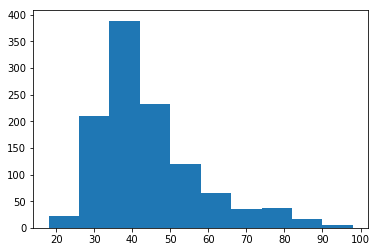

In [65]:
plt.hist(df_crossjoined_5largest_by_index_2k15.sort_ratio)

In [66]:
df_crossjoined[(df_crossjoined.sort_ratio>=75) & (df_crossjoined.sort_ratio<=100)]

,college_name_2k15,coll_name_mod_norm_wo_common_words_v2_2k15,tcs_region,mod_index_2k15,college_name_2k16,coll_name_mod_norm_wo_common_words_v2_2k16,mod_index_2k16,sort_ratio
27,"Osmania University, Hyderabad",osmania hyderabad,Hyderabad,2k15_2,Vasavi College of Engineering ­Hyderabad,vasavi hyderabad,2k16_376,79
156,Anil Neerukonda Institute of Technology & Scie...,anil neerukonda sciences,Hyderabad,2k15_16,Anil Neerukonda Institute of Technology,anil neerukonda,2k16_38,77
244,VNR Vignana Jyothi Institute of Engineering & ...,vnr vignana jyothi hyderabad,Hyderabad,2k15_42,VNR Vignana Jyothi Institute of Engineering,vnr vignana jyothi,2k16_258,78
430,Sri Venkateswara College of Engineering & Tech...,sri venkateswara chittoor,Hyderabad,2k15_192,Sri Venkateswara College of Engineering,sri venkateswara,2k16_492,78
478,Gokaraju Rangaraju Institute of Engg. & Manage...,gokaraju rangaraju hyderabad,Hyderabad,2k15_265,Gokaraju Rangaraju Institute of Engg.,gokaraju rangaraju,2k16_286,78
716,St Martins Engineering College,st martins,Hyderabad,2k15_396,St. Martin's Engineering College,st martin s,2k16_337,95
755,St Martins Engineering College,st martins,Hyderabad,2k15_396,St.Martin's Engineering College,st martin s,2k16_608,95
974,KIET Kakinada,kiet kakinada,Hyderabad,2k15_468,KAKINADA INSTITUTE OF ENGINEERING,kakinada,2k16_523,76
1082,"Medicaps Inst of Tech & Management, Indore",medicaps tech indore,Mumbai,2k15_3,Medicaps Inst of Tech,medicaps tech,2k16_61,79
1319,"Oriental Institute of Science & Technology, Bh...",oriental science bhopal,Mumbai,2k15_168,Oriental Institute of Science,oriental science,2k16_172,82


In [67]:
df_crossjoined_5largest_by_index_2k15.to_excel('./crossjoined_df_2k15_2k16_after_token_sort.xlsx',index=False)

In [68]:
df_matches_manually=pd.read_excel('./crossjoined_df_2k15_2k16_after_token_sort (copy).xlsx')
df_matches_manually=df_matches_manually[df_matches_manually.match=='y']

In [69]:
colleges_combined=pd.DataFrame(college_2k15)
colleges_combined=colleges_combined.append(college_2k16,ignore_index=True)
colleges_combined.shape

(1233, 8)

We will be using a disjoint data set structure to match the entries with one another..

In [82]:
def find(dic,index):
    return dic[index]
def union(dic,index1,index2):
    root1=find(dic,index1)
    root2=find(dic,index2)
    for key,value in dic.items():
        if value==root2:
            #print('Changed key {} from {} to {}'.format(key,value,root1))
            dic[key]=root1

In [83]:
match_dict={}
for item in colleges_combined.mod_index:
    match_dict[item]=item
len(match_dict.keys())

1233

In [84]:
for _,row in df_matches_joined_2k15_2k16_till_norm_wo_common_words.iterrows():
    union(match_dict,row.mod_index_2k15,row.mod_index_2k16)

for _,row in df_matches_manually.iterrows():
    union(match_dict,row.mod_index_2k15,row.mod_index_2k16)

In [93]:
print(match_dict['2k16_143']) #Sanity Check
print(match_dict['2k16_272']) #Sanity Check
print(match_dict['2k16_291']) #Sanity Check
print(match_dict['2k16_664']) #Sanity Check

2k15_0
2k15_2
2k15_547
2k15_521


In [90]:
colleges_combined['master_mod_index']=colleges_combined.mod_index.apply(lambda x:match_dict[x])
no_of_matching_entries=sum((colleges_combined.master_mod_index==colleges_combined.mod_index) )
(no_of_matching_entries,colleges_combined.shape[0]-no_of_matching_entries)

(809, 424)

In [100]:
c
colleges_combined.to_excel('./college_combined_2k15_2k16.xlsx',index=False)

## TODO: Use partial sort ratio and check...also remove the tcs_region name and then check

For more advanced string matching techniques, we take the help of an external library named *FuzzyWuzzy* written by the good folks at SeatGeek(an online event website)...

To read more, visit this link http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

To use it on your system, simply run *!pip install fuzzywuzzy* from the notebook itself or *pip install fuzzywuzzy* from the terminal